<a href="https://colab.research.google.com/github/mublify/Time-Series/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting in Python

Have you ever wondered how businesses can forecast sales or predict future trends by analyzing past data? In this notebook, we'll explore forecasting models, including ARIMA and Holt-Winters, to see how these techniques help make accurate predictions for future demand.

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Libraries and Dependencies

- **Pandas (`pd`)**: For data handling and manipulation, including reading CSV files.
- **NumPy (`np`)**: For efficient numerical operations.
- **Matplotlib (`plt`)**: For visualizing time series data patterns.
- **Datetime (`datetime`)**: For handling date and time, essential in time series data.
- **ADF Test (`adfuller`)**: Checks if the time series is stationary.
- **ARIMA (`ARIMA`)**: Forecasting model based on past values.
- **Auto ARIMA (`auto_arima`)**: Automates ARIMA parameter selection.
- **Seasonal Decompose (`seasonal_decompose`)**: Decomposes data into trend, seasonality, and residuals.
- **Exponential Smoothing (`ExponentialSmoothing`, `SimpleExpSmoothing`)**: Smooths data, useful for seasonal models.
- **Metrics (`mean_squared_error`, `mean_absolute_error`)**: Evaluate model accuracy.

In [ ]:
df=pd.read_csv('train.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


Since we will be working with Order Date, we need to convert our order date from object format to date time.

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


Resample Sales Data to Monthly Totals

Here, we transform daily sales data into monthly totals. The key steps are:

1. **Group by Month-End**:
   - We use `pd.groupby` to group data by the **end of each month** (`freq='ME'`), which aggregates all sales at each month end.

2. **Specify Grouping Column**:
   - The `key='Order Date'` argument tells `groupby` to use the **Order Date** column to define each month's group.

3. **Select and Sum Sales**:
   - After grouping, we use `['Sales'].sum()` to **sum the sales values** for each month.

The result is a DataFrame with monthly total sales, where each row shows the month's end date and the total sales for that month.


In [ ]:
monthly_sales=df.groupby(pd.Grouper(key='Order Date',freq='ME'))['Sales'].sum().reset_index()
monthly_sales.head()

,Order Date,Sales
0,2015-01-31,14205.707
1,2015-02-28,4519.892
2,2015-03-31,55205.797
3,2015-04-30,27906.855
4,2015-05-31,23644.303


### Visualize Monthly Sales Data

To create a time series plot of monthly sales, we use Matplotlib with the following code:

1. **Set Figure Size**:
   - `plt.figure(figsize=(10,5))` sets the width and height of the plot to ensure readability.

2. **Plot Data**:
   - `plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])` plots the `Sales` column against the `Order Date`, showing sales trends over time.

3. **Add Labels and Title**:
   - `plt.title('Monthly Sales')` gives the plot a title.
   - `plt.xlabel('Date')` labels the x-axis with "Date".
   - `plt.ylabel('Sales')` labels the y-axis with "Sales".

4. **Display Plot**:
   - `plt.show()` renders the plot for viewing.

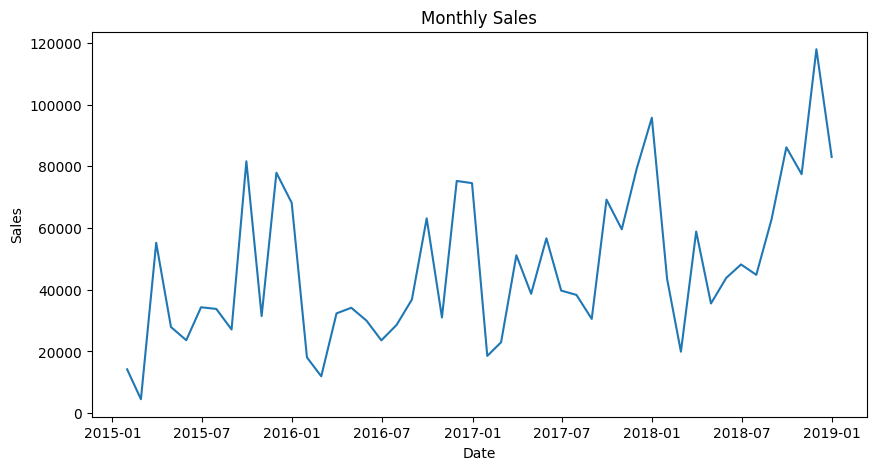

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order Date'],monthly_sales['Sales'])
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
#

As seen in the graph, the trends are spiky, but in general, they have upward Trends. However, it fluctuates a lot which makes it a little difficult to make predictions.

### Decompose the Time Series Data

Decomposition breaks down time series data into trend, seasonal, and residual components, helping to reveal underlying patterns. Here’s how the code achieves this:

1. **Set Date as Index**:
   - `monthly_sales = monthly_sales.set_index('Order Date')` makes `Order Date` the index, which is essential for time series analysis.

2. **Decompose the Data**:
   - `decomposition = seasonal_decompose(monthly_sales, model='additive')` decomposes the sales data using an **additive model**, where the data is assumed to be the sum of trend, seasonality, and residual components.

3. **Plot Decomposed Components**:
   - `fig = decomposition.plot()` creates subplots for the trend, seasonal, and residual components.
   - `fig.set_size_inches(10,5)` sets the figure size for better readability.

4. **Display the Plot**:
   - `plt.show()` renders the decomposition plot, displaying the separate components.

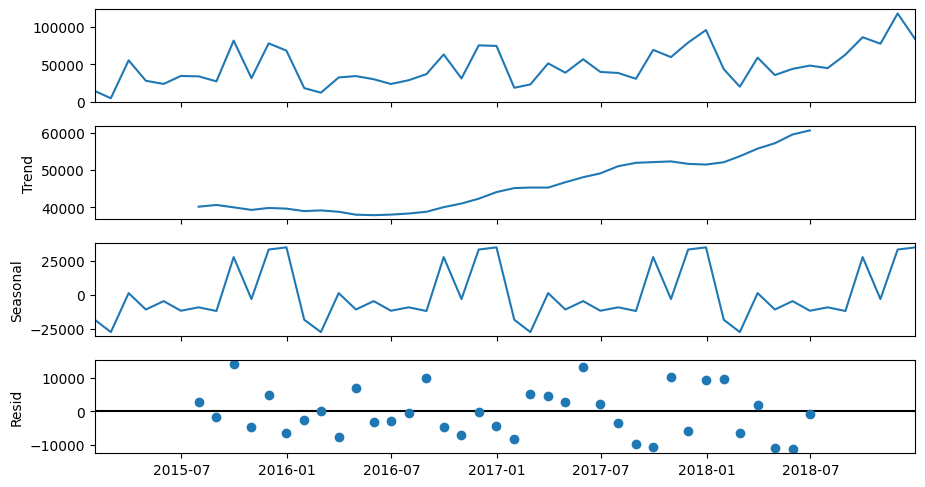

In [ ]:
# Set 'Order Date' as the index
monthly_sales = monthly_sales.set_index('Order Date')

decomposition=seasonal_decompose(monthly_sales, model='additive')
fig=decomposition.plot()
fig.set_size_inches(10,5)
plt.show()

### Interpreting the Decomposition Plot

The decomposition plot explains:

1. **Observed (Sales)**: The first chart shows the actual monthly sales data over time.

2. **Trend:** The trend component reveals a consistent upward trajectory, indicating a year-over-year increase in sales.

2. **Seasonality**: The seasonal component highlights recurring patterns within each year. Seasonality is crucial, as sales often peak around key events like end-of-season clearances or Black Friday. This seasonal pattern repeats annually, reflecting periodic increases and decreases in sales.

3. **Residual**: The residual (or noise) component represents random fluctuations that remain after removing the trend and seasonal effects. This part of the data captures variations that aren’t explained by the model’s identified patterns.


### Test for Stationarity in Time Series Data

Stationarity in time series means that the statistical properties (like mean and variance) remain constant over time, making the series easier to model. Here, we use the Augmented Dickey-Fuller (ADF) test to check for stationarity.

In [ ]:
# Define the Function to perform the ADF test.
def check_stationarity(timeseries):
  result=adfuller(timeseries)            # Runs the ADF test, returning a series of statistics to evaluate stationarity.
  print('ADF Statistic: %f' %result[0])  # A test statistic where a lower value suggests the series may be stationary.
  print('p-value: %f' %result[1])        # If this value is below 0.05, we reject the null hypothesis and conclude the series is likely stationary.
  print ('Critical Values:')             # Thresholds at 1%, 5%, and 10% significance levels, useful for interpreting the ADF statistic.
  for key,value in result[4].items():
    print(f'\t{key}:{value}')
  return result[1]<0.05                  # Returns `True` if the p-value is below 0.05, indicating the series is stationary.


is_stationary=check_stationarity(monthly_sales)
print(f"\nTime series is {'stationary' if is_stationary else 'non-stationary'}")

ADF Statistic: -4.416137
p-value: 0.000278
Critical Values:
	1%:-3.5778480370438146
	5%:-2.925338105429433
	10%:-2.6007735310095064

Time series is stationary


### Build an Auto ARIMA Model

We'll attempt to automatically determine the optimal parameters for an ARIMA model based on the provided time series data.

```python
automodel = auto_arima(monthly_sales,
                       start_p=0, start_q=0,      # Starting values for p and q
                       max_p=5, max_q=5,          # Max values for p and q
                       m=12,                      # Seasonal period (yearly seasonality)
                       seasonal=True,             # Enable seasonal ARIMA
                       d=None,                    # Automatically determine differencing (d)
                       trace=True,                # Display the progress
                       error_action='ignore',     # Ignore failed parameter sets
                       suppress_warnings=True,    # Suppress warning messages
                       stepwise=True)             # Use stepwise search to optimize


In [ ]:
automodel=auto_arima(monthly_sales,
                     start_p=0, start_q=0,
                     max_p=5, max_q=5,
                     m=12,
                     seasonal=True,
                     d=None,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1085.632, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1096.560, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1076.500, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1077.487, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1094.708, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1089.579, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.250, Time=0.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1078.452, Time=0.21 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1080.901, Time=0.31 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1079.864, Time=1.35 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.035, Time=0.45 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.635, Time=1.71 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.151, Time=0.59 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.267, Time=2.38 sec
 ARIMA(2,1,0)(1,0,1

* This model uses 2 prior observations and 1 seasonal lag (12 months) to predict sales values, capturing both trend and seasonal patterns effectively based on our data.

ARIMA(2,1,0): This part specifies the non-seasonal parameters:

    * p=2: The order of the autoregressive (AR) term, indicating that the model uses 2 past values in predicting the current value.
    * d=1: The order of differencing needed to make the series stationary.
    * q=0: The order of the moving average (MA) term, indicating no MA terms are used in this model.

(1,0,0)[12]: This part specifies the seasonal component:

    * P=1: The order of the seasonal autoregressive (SAR) term, meaning it considers 1 previous season (12 months back) in predicting current values.
    * D=0: The order of seasonal differencing, which isn’t required here (0).
    * Q=0: The order of the seasonal moving average (SMA) term, which isn’t used here.
    * [12]: Indicates that the model accounts for yearly seasonality (12 months).


* The fit time shows that it took about 15.9 seconds for the algorithm to complete the search and fit the model with these parameters.

### Fitting the Model

Here we train the ARIMA model on the monthly sales data using the optimal parameters identified by the auto_arima function.

In [ ]:
model=ARIMA(monthly_sales,                  # Initialise the ARIMA model with monthly_sales data
  order=automodel.order,                    # Sets the ARIMA model's non-seasonal parameters
  seasonal_order=automodel.seasonal_order)  # Sets the model's seasonal parameters
results=model.fit()                         # This line fits (or trains) the ARIMA model on the monthly_sales data using the optimal parameters.

#The output results is the fitted model, which contains key information about the model's parameters and the fitted values.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


### Generate the Forecast

We will generate a 12-month forecast based on our fitted ARIMA model.

In [ ]:
forecast_periods=12     # 12 months

# Generate the forecast using the fitted ARIMA model for the specified number of periods
forecast=results.get_forecast(steps=forecast_periods)

#Extract the mean (or expected) forecast values over the 12-month forecast horizon.
mean_forecast=forecast.predicted_mean

forecast_df=forecast.summary_frame()

### Computing Confidence Intervals


    alpha=0.05: 95% confidence interval, suggesting high certainty.
    alpha=0.2: 80% confidence interval, providing a narrower range.
    alpha=0.3: 70% confidence interval, with the narrowest range, indicating lower certainty.

In [ ]:
conf_int_95=forecast.conf_int(alpha=0.05)
conf_int_80=forecast.conf_int(alpha=0.2)
conf_int_70=forecast.conf_int(alpha=0.3)

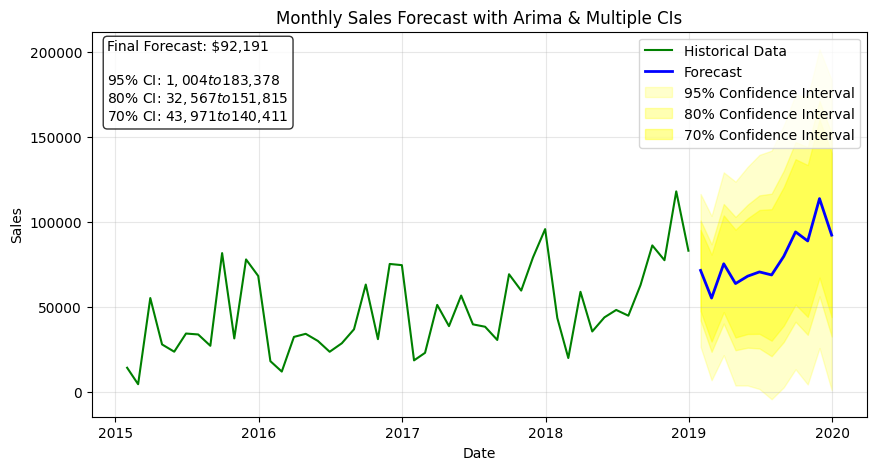

In [ ]:
# Plot historical data and forecast
plt.figure(figsize=(10, 5))


plt.plot(monthly_sales, label='Historical Data', color='green') #plots historical sales in green.
plt.plot(mean_forecast, label='Forecast', color='blue', linewidth=2) #displays forecasted values from the ARIMA model in blue with a thicker line for emphasis.

# Plot confidence intervals 95%
plt.fill_between(mean_forecast.index,
                 conf_int_95.iloc[:, 0],
                 conf_int_95.iloc[:, 1],
                 color='yellow', alpha=0.2, label='95% Confidence Interval') #Lightest yellow, for the widest range.

#Plot Confidence intervals 80%
plt.fill_between(mean_forecast.index,
                 conf_int_80.iloc[:, 0],
                 conf_int_80.iloc[:, 1],
                 color='yellow', alpha=0.3, label='80% Confidence Interval') #Medium shade of yellow.

#Plot Confidence intervals 70%
plt.fill_between(mean_forecast.index,
                 conf_int_70.iloc[:,0],
                 conf_int_70.iloc[:,1],
                 color='yellow', alpha=0.4, label='70% Confidence Interval')  #Darkest yellow, indicating the narrowest range.

# Add labels and title
plt.title('Monthly Sales Forecast with Arima & Multiple CIs')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)

#Get final values

last_forecast=mean_forecast.iloc[-1]

ranges_95_lower=conf_int_95.iloc[-1,0]
ranges_95_upper=conf_int_95.iloc[-1,1]

ranges_80_lower=conf_int_80.iloc[-1,0]
ranges_80_upper=conf_int_80.iloc[-1,1]

ranges_70_lower=conf_int_70.iloc[-1,0]
ranges_70_upper=conf_int_70.iloc[-1,1]

#Create Information text
info_text= f'Final Forecast: ${last_forecast:,.0f}\n\n'\
           f'95% CI: ${ranges_95_lower:,.0f}  to  ${ranges_95_upper:,.0f}\n'\
           f'80% CI: ${ranges_80_lower:,.0f}  to  ${ranges_80_upper:,.0f}\n'\
           f'70% CI: ${ranges_70_lower:,.0f}  to  ${ranges_70_upper:,.0f}'

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', boxstyle='round', alpha=0.8))

plt.show()

In [ ]:
print('\nModel Performance Metrics')
mse=mean_squared_error(monthly_sales, results.fittedvalues) #average squared difference between actual and fitted values.
rmse=np.sqrt(mse) # square root of MSE, indicating the model's error magnitude.
mae=mean_absolute_error(monthly_sales, results.fittedvalues) # average absolute difference between actual and predicted values.

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

print("\n Forecast Ranges for Final Period")
print(f"\nPoint Forecast: ${last_forecast:,.0f}")

print("\nConfidence Intervals:")
print(f"95% CI: ${ranges_95_lower:,.0f} to ${ranges_95_upper:,.0f}")
print(f"80% CI: ${ranges_80_lower:,.0f} to ${ranges_80_upper:,.0f}")
print(f"70% CI: ${ranges_70_lower:,.0f} to ${ranges_70_upper:,.0f}")

print("\nInterval Widths as Percentages of Forecast:")
print(f"95% CI Width: {(ranges_95_upper - ranges_95_lower) /2/ last_forecast * 100:.2f}%")
print(f"80% CI Width: {(ranges_80_upper - ranges_80_lower) /2/ last_forecast * 100:.2f}%")
print(f"70% CI Width: {(ranges_70_upper - ranges_70_lower) /2/ last_forecast * 100:.2f}%")

#Forecast Df
forecast_df=pd.DataFrame({
    'Forecast': mean_forecast,
    '95 Lower CI': conf_int_95.iloc[:,0],
    '95 Upper CI': conf_int_95.iloc[:,1],
    '80 Lower CI': conf_int_80.iloc[:,0],
    '80 Upper CI': conf_int_80.iloc[:,1],
    '70 Lower CI': conf_int_70.iloc[:,0],
    '70 Upper CI': conf_int_70.iloc[:,1]
})

print("\nDetailed Forecast with Confidence Intervals:")
forecast_df


Model Performance Metrics
Mean Squared Error: 372198461.4106795
Root Mean Squared Error: 19292.44570837714
Mean Absolute Error: 14432.381133655668

 Forecast Ranges for Final Period

Point Forecast: $92,191

Confidence Intervals:
95% CI: $1,004 to $183,378
80% CI: $32,567 to $151,815
70% CI: $43,971 to $140,411

Interval Widths as Percentages of Forecast:
95% CI Width: 98.91%
80% CI Width: 64.67%
70% CI Width: 52.30%

Detailed Forecast with Confidence Intervals:


,Forecast,95 Lower CI,95 Upper CI,80 Lower CI,80 Upper CI,70 Lower CI,70 Upper CI
2019-01-31,71457.294751,26519.448466,116395.141036,42074.016429,100840.573073,47694.059962,95220.529539
2019-02-28,55170.675698,6856.399051,103484.952345,23579.668229,86761.683168,29621.976895,80719.374502
2019-03-31,75354.273330,21594.176485,129114.370174,40202.435430,110506.111230,46925.812485,103782.734175
2019-04-30,63712.967935,3787.033048,123638.902823,24529.505241,102896.430630,32023.997983,95401.937888
2019-05-31,68065.122556,3753.333485,132376.911627,26013.903953,110116.341158,34056.902988,102073.342124
2019-06-30,70562.386142,1722.863584,139401.908699,25550.641742,115574.130541,34159.890862,106964.881421
2019-07-31,68781.958294,-4308.035962,141871.952550,20990.979836,116572.936753,30131.803964,107432.112625
2019-08-31,79738.550996,2724.249373,156752.852620,29381.605872,130095.496120,39013.214051,120463.887941
2019-09-30,94101.274958,13300.622934,174901.926983,41268.568380,146933.981537,51373.707354,136828.842562
2019-10-31,88767.503543,4360.758298,173174.248789,33576.899346,143958.107741,44133.025685,133401.981402


# Model Performance Metrics and Forecast Analysis

## Model Performance Metrics
Here’s a breakdown of the metrics used to check how well our model is doing. Each metric tells us something about the accuracy of the predictions.

1. **Mean Squared Error (MSE)**: `372,198,461.41`
   - MSE is the average of the squared differences between what the model predicted and the actual sales. The squaring gives more weight to bigger errors, so large differences stand out.
   - **Interpretation**: Ideally, a lower MSE is what we want—it means the model’s predictions are closer to reality. Here, a high MSE suggests the model might not be hitting the mark and could benefit from fine-tuning.

2. **Root Mean Squared Error (RMSE)**: `19,292.45`
   - RMSE is simply the square root of MSE. This brings the error back into the same unit as our sales data, making it more intuitive to understand.
   - **Interpretation**: On average, each forecasted value is off by around $19,292. This is a significant error margin, suggesting the model might need some improvement to be truly useful for decision-making.

3. **Mean Absolute Error (MAE)**: `14,432.38`
   - MAE is the average of the absolute differences between predicted and actual values, so each error is treated equally.
   - **Interpretation**: With an MAE of $14,432, our model’s predictions are, on average, off by this amount. This value is smaller than RMSE, which tells us that some errors are quite large (since MSE and RMSE emphasize larger errors).

## Forecast Ranges for Final Period
For the last period forecasted, the model gives a single forecasted value, along with several ranges (confidence intervals) that show where the actual values might fall.

- **Point Forecast**: `$92,191`

### Confidence Intervals
Confidence intervals give us a range where we expect the actual values to fall, with each interval representing a different level of certainty.

- **95% Confidence Interval**: `$1,004 to $183,378`
  - This is a wide range, meaning there’s a lot of uncertainty. Even though we forecast sales around $92,191, the true value could vary widely.

- **80% Confidence Interval**: `$32,567 to $151,815`
  - Slightly narrower, this interval shows the range with an 80% confidence level. It’s still pretty wide, indicating that we have room to improve the model's precision.

- **70% Confidence Interval**: `$43,971 to $140,411`
  - This is the most precise of the intervals shown but with less certainty. It’s a narrower range, but still reflects that our predictions have a lot of variability.

### Interval Widths as Percentages of Forecast
These percentages show how much each interval spans relative to our forecasted value, helping us see just how wide the range of potential values really is.

- **95% CI Width**: `98.91%`
  - This interval width shows that the range nearly doubles our forecast, suggesting high uncertainty.

- **80% CI Width**: `64.67%`
  - Still fairly wide, showing significant variability.

- **70% CI Width**: `52.30%`
  - The smallest range, though still showing that even with lower confidence, the forecast has substantial variability.

## Summary and Interpretation
While the model gives us a forecast, the large confidence intervals highlight a lot of uncertainty in the predictions. The 95% confidence interval almost doubles the forecasted value, showing that there’s quite a bit of spread in possible outcomes. This indicates the model might need adjustments or additional data to improve its reliability and reduce the level of uncertainty in predictions.

## Holt-Winters Model


This code block builds three different Exponential Smoothing models on monthly sales data, each with unique settings for trend and seasonality. The models vary in configuration to test which performs best: the first uses additive trend and seasonality, the second uses additive trend with multiplicative seasonality, and the third uses multiplicative trend with additive seasonality. Each model includes damping to slow the trend over time, and smoothing parameters are manually set for the level, trend, and seasonality components. By comparing these models, we can identify which best captures the patterns in the sales data.

In [ ]:
# Step 1: Initialize an empty list to store model configurations
models = []

# Step 2: Create a list of model specifications
# Each specification has unique trend and seasonality settings to test different combinations
specifications = [
    # First Model: Fixed Parameters - additive trend and seasonality
    {
        'name': 'Fixed Parameters',
        'model': ExponentialSmoothing(
            monthly_sales,
            trend='add',  # Additive trend component, adds a constant trend each period
            seasonal='add',  # Additive seasonal component, seasonality remains constant over time
            seasonal_periods=12,  # Set to 12 for yearly seasonality (monthly data)
            damped_trend=True  # Damped trend, trend component decreases over time
        ).fit(
            smoothing_level=0.2,  # Controls weight given to recent observations for level component
            smoothing_trend=0.1,  # Controls smoothing of the trend component
            smoothing_seasonal=0.1,  # Controls smoothing of the seasonal component
            damping_trend=0.98,  # Damping factor, close to 1 for a minimally damped trend
            optimized=False  # Disables automatic parameter optimization
        )
    },

    # Second Model: Multiplicative Seasonal - additive trend and multiplicative seasonality
    {
        'name': 'Multiplicative Seasonal',
        'model': ExponentialSmoothing(
            monthly_sales,
            trend='add',  # Additive trend component
            seasonal='mul',  # Multiplicative seasonal component, seasonal effect scales with data level
            seasonal_periods=12,  # Seasonal period set to 12 months
            damped_trend=True  # Enables a damped trend that reduces over time
        ).fit(
            smoothing_level=0.2,  # Controls level smoothing
            smoothing_trend=0.1,  # Controls trend smoothing
            smoothing_seasonal=0.1,  # Controls seasonal smoothing
            damping_trend=0.98,  # Minimal damping on the trend
            optimized=False  # Parameter optimization disabled
        )
    },

    # Third Model: Multiplicative Trend - multiplicative trend and additive seasonality
    {
        'name': 'Multiplicative Trend',
        'model': ExponentialSmoothing(
            monthly_sales,
            trend='mul',  # Multiplicative trend, where trend scales with data level
            seasonal='add',  # Additive seasonal component, constant seasonality
            seasonal_periods=12,  # Defines yearly seasonality
            damped_trend=True  # Damped trend enabled
        ).fit(
            smoothing_level=0.2,  # Level component smoothing factor
            smoothing_trend=0.1,  # Trend component smoothing factor
            smoothing_seasonal=0.1,  # Seasonal component smoothing factor
            damping_trend=0.98,  # Trend damping factor
            optimized=False  # Manual parameter values used
        )
    }
]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


### Evaluating the models

Create a list of models, each with different configurations for trend and seasonality. For each model, we calculated performance metrics such as the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

In [ ]:
results=[]
for spec in specifications:
    model=spec['model']
    name=spec['name']

#Calculate the Metrics
    rmse=np.sqrt(mean_squared_error(monthly_sales, model.fittedvalues))
    mae=mean_absolute_error(monthly_sales, model.fittedvalues)


#Append the results to the list
    results.append({
      'name': name,
      'RMSE': rmse,
      'MAE': mae,
      'model':model
})

### Find the best performing model

In [ ]:
best_model=min(results, key=lambda x: x['RMSE'])
hw_model = best_model['model']
hw_forecast = hw_model.forecast(12)
print(f"The best performing model is {best_model['name']} with RMSE: {best_model['RMSE']}")

The best performing model is Multiplicative Trend with RMSE: 9762.290924720162


After evaluating all models, the best model was chosen based on its RMSE, indicating it had the smallest error and fit the data the best. The model selected was the **Multiplicative Trend Holt-Winters model**.

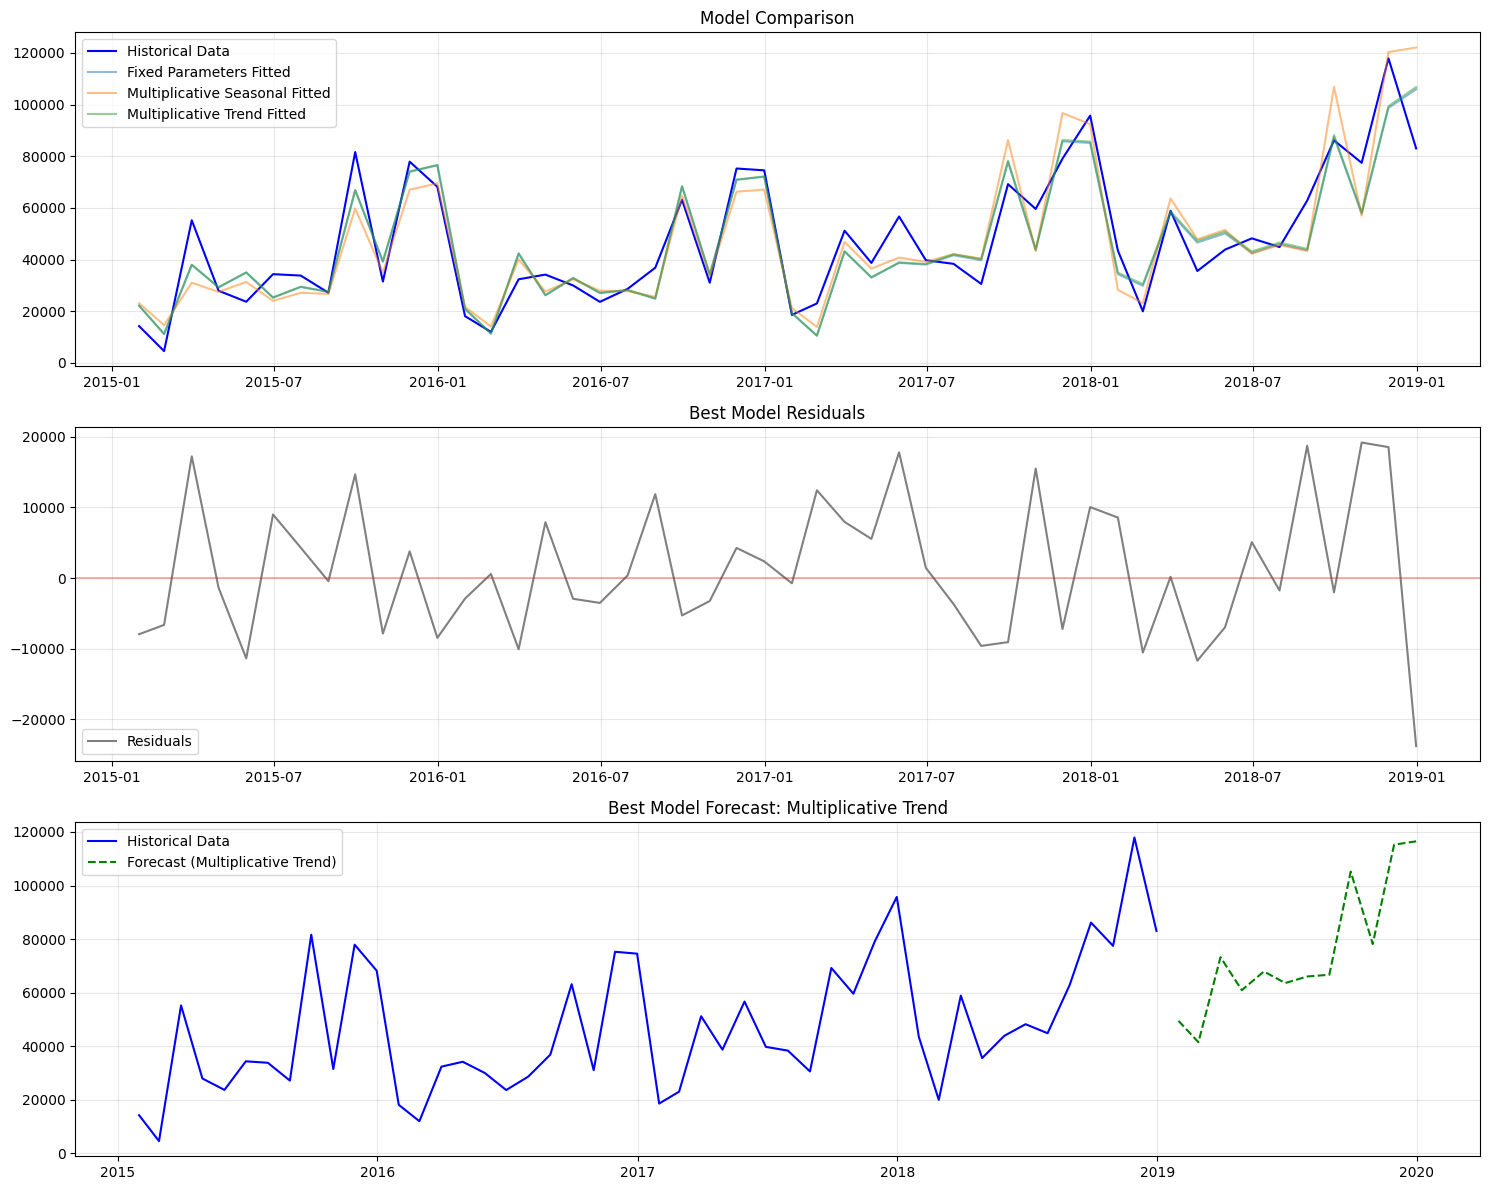

In [ ]:
# Visualization
plt.figure(figsize=(15, 12))

# First subplot: All models
plt.subplot(3, 1, 1)
plt.plot(monthly_sales.index, monthly_sales, label='Historical Data', color='blue')
for result in results:
    plt.plot(result['model'].fittedvalues.index,
             result['model'].fittedvalues,
             label=f"{result['name']} Fitted",
             alpha=0.5)
plt.title('Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Second subplot: Residuals of best model
plt.subplot(3, 1, 2)
monthly_sales_series = monthly_sales['Sales']
residuals = monthly_sales_series - hw_model.fittedvalues
plt.plot(monthly_sales.index, residuals, label='Residuals', color='gray')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Best Model Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# Third subplot: Best model forecast of future
plt.subplot(3, 1, 3)
plt.plot(monthly_sales.index, monthly_sales, label='Historical Data', color='blue')
plt.plot(hw_forecast.index, hw_forecast,
         label=f'Forecast ({best_model["name"]})',
         color='green', linestyle='--')
plt.title(f'Best Model Forecast: {best_model["name"]}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Model Comparison (First Plot: All Models)

    We compared the performance of three Holt-Winters models by plotting historical data alongside the fitted values of each model.
    The historical data is represented by the dark blue line, while the fitted values of the three models are plotted with varying transparency.
    By examining the models' fit to historical data, we visually identified that the Multiplicative Trend model closely followed the trend of increasing sales with constant seasonality.

Residuals Analysis (Second Plot: Best Model Residuals)

    After forecasting, we plotted the residuals (the differences between the actual values and the fitted values) for the best model.
    The residual plot shows how well the model captures the underlying patterns in the data. A reference line at y=0 helps to visualize whether residuals are centered around zero.

Best Model Forecast (Third Plot: Best Model Forecast)

    Based on the Root Mean Squared Error (RMSE), we identified the best-performing model: Multiplicative Trend.
    The forecast generated by this model for the next 12 periods is displayed in red (dashed line), providing a clearer view of future predictions.
    The plot visually confirms that the Multiplicative Trend model is appropriate for our dataset, where revenue is increasing, but the seasonal pattern remains constant each year.

### Model Evaluation

For each model, we display the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), which help us assess how accurately each model predicts the data.

In [ ]:
# Print Results
print("\nModel Comparison:")
for result in results:
    print(f"\n{result['name']}:")
    print(f"RMSE: ${result['RMSE']:.2f}")
    print(f"MAE: ${result['MAE']:.2f}")


Model Comparison:

Fixed Parameters:
RMSE: $9783.60
MAE: $7831.27

Multiplicative Seasonal:
RMSE: $11758.67
MAE: $8762.04

Multiplicative Trend:
RMSE: $9762.29
MAE: $7841.90


In [ ]:
print(f"\nBest Model: {best_model['name']}")
print(f"Best RMSE: ${best_model['RMSE']:.2f}")


Best Model: Multiplicative Trend
Best RMSE: $9762.29


The **Multiplicative Trend** model is identified as the best model, as it has the *lowest RMSE*, indicating the best fit for the data.

However, it's important to note that all models performed well, with the Fixed Parameters model also showing relatively low RMSE and MAE, suggesting it predicts the data fairly accurately.

### Comparison of ARIMA and Holt-Winters Model:


While comparing the ARIMA model with the Multiplicative Trend Holt-Winters model using Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) metrics, we discover that The Holt-Winters model has significantly lower RMSE **(9,762.29)** compared to ARIMA’s RMSE **(19292.45)**, indicating a substantial improvement in predictive accuracy.

For *MAE*, the Holt-Winters model achieves a value of around **7,841.9**, much lower than ARIMA's **14,432.38**. Both metrics confirm that the Holt-Winters model provides more accurate predictions for this dataset.

In [ ]:
print("\nBest Model Parameters:")
print(f"- Smoothing level: {hw_model.params['smoothing_level']:.3f}")
print(f"- Trend Smoothing: {hw_model.params['smoothing_trend']:.3f}")
print(f"- Seasonal Smoothing: {hw_model.params['smoothing_seasonal']:.3f}")
print(f"- Damping parameter: {hw_model.params['damping_trend']:.3f}")


Best Model Parameters:
- Smoothing level: 0.200
- Trend Smoothing: 0.100
- Seasonal Smoothing: 0.100
- Damping parameter: 0.980


### Explanation of Multiplicative Trend Parameters

- **Smoothing Level (0.200)**: This setting tells the model to give 20% weight to the most recent data, so newer data slightly influences the overall trend.

- **Trend Smoothing (0.100)**: With 10% weight, the trend adjusts gradually, making the model less reactive to sudden shifts in direction.

- **Seasonal Smoothing (0.100)**: This also has a 10% smoothing factor, allowing seasonal patterns to adapt slowly over time rather than reacting quickly to recent changes.

- **Damping Parameter (0.980)**: A high damping factor close to 1.0 means the trend effect fades slowly, keeping the overall growth or decline steady without overemphasizing future growth.

Together, these settings create a stable model, balancing between past data and recent trends without overreacting to sudden fluctuations.

In [ ]:
# Print Forecast
forecast_df

,Forecast,95 Lower CI,95 Upper CI,80 Lower CI,80 Upper CI,70 Lower CI,70 Upper CI
2019-01-31,71457.294751,26519.448466,116395.141036,42074.016429,100840.573073,47694.059962,95220.529539
2019-02-28,55170.675698,6856.399051,103484.952345,23579.668229,86761.683168,29621.976895,80719.374502
2019-03-31,75354.273330,21594.176485,129114.370174,40202.435430,110506.111230,46925.812485,103782.734175
2019-04-30,63712.967935,3787.033048,123638.902823,24529.505241,102896.430630,32023.997983,95401.937888
2019-05-31,68065.122556,3753.333485,132376.911627,26013.903953,110116.341158,34056.902988,102073.342124
2019-06-30,70562.386142,1722.863584,139401.908699,25550.641742,115574.130541,34159.890862,106964.881421
2019-07-31,68781.958294,-4308.035962,141871.952550,20990.979836,116572.936753,30131.803964,107432.112625
2019-08-31,79738.550996,2724.249373,156752.852620,29381.605872,130095.496120,39013.214051,120463.887941
2019-09-30,94101.274958,13300.622934,174901.926983,41268.568380,146933.981537,51373.707354,136828.842562
2019-10-31,88767.503543,4360.758298,173174.248789,33576.899346,143958.107741,44133.025685,133401.981402


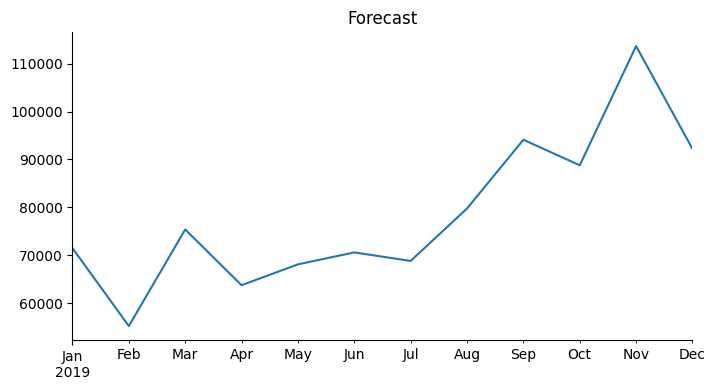

In [ ]:
# @title Forecast

from matplotlib import pyplot as plt
forecast_df['Forecast'].plot(kind='line', figsize=(8, 4), title='Forecast')
plt.gca().spines[['top', 'right']].set_visible(False)